In [2]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
import glob
import intake

In [3]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")
print(list(cat.FESOM))

['IFS_4.4-FESOM_5-cycle3']


In [5]:
print(list(cat['FESOM']['IFS_4.4-FESOM_5-cycle3']))

['2D_1h_0.25deg', '2D_1h_1deg', '2D_1h_native', '2D_daily_0.25deg', '2D_daily_1deg', '2D_daily_native', '2D_monthly_0.25deg', '2D_monthly_1deg', '2D_monthly_native', '3D_1h_native_zarr', '3D_3h_native', '3D_daily_native', '3D_daily_native_zarr', 'elem_grid', 'node_grid']


In [8]:
data = cat['FESOM']['IFS_4.4-FESOM_5-cycle3']['2D_daily_0.25deg'].to_dask()

In [9]:
data

<xarray.Dataset>
Dimensions:   (time: 1808, lat: 721, lon: 1440)
Coordinates:
  * time      (time) datetime64[ns] 2020-01-20T23:56:00 ... 2024-12-31T23:56:00
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Data variables: (12/13)
    MLD1      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    MLD2      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    atmice_x  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    atmice_y  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    atmoce_x  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    atmoce_y  (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...        ...
    m_ice     (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    m_snow    (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    prec      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ssh       (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    uice      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    vice      (time, lat, lon) float32 dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
Attributes:
    model:              FESOM2
    experiment:         IFS_4.4-FESOM_5-cycle3
    var_type:           2D_daily_native
    target_resolution:  025

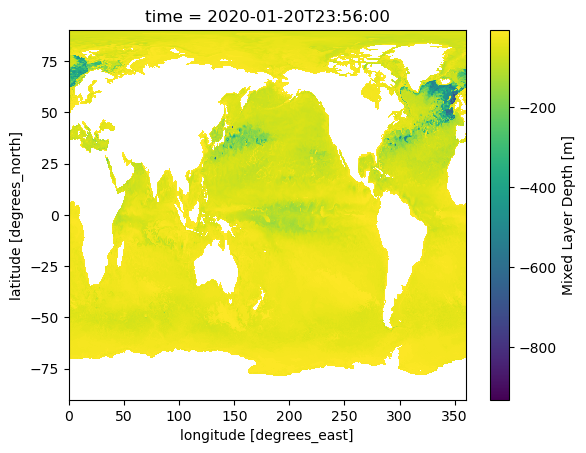

In [10]:
data['MLD1'][0,:].plot()

In [11]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [12]:
projection="PlateCarree"
working_projection = getattr(ccrs, projection)()
domain = None
if projection == "NorthPolarStereo":
    domain = domain or [-180, 180, 60, 90]
elif projection == "SouthPolarStereo":
    domain = domain or [-180, 180, -90, -60]
domain = domain or [-180, 180, -90, 90]

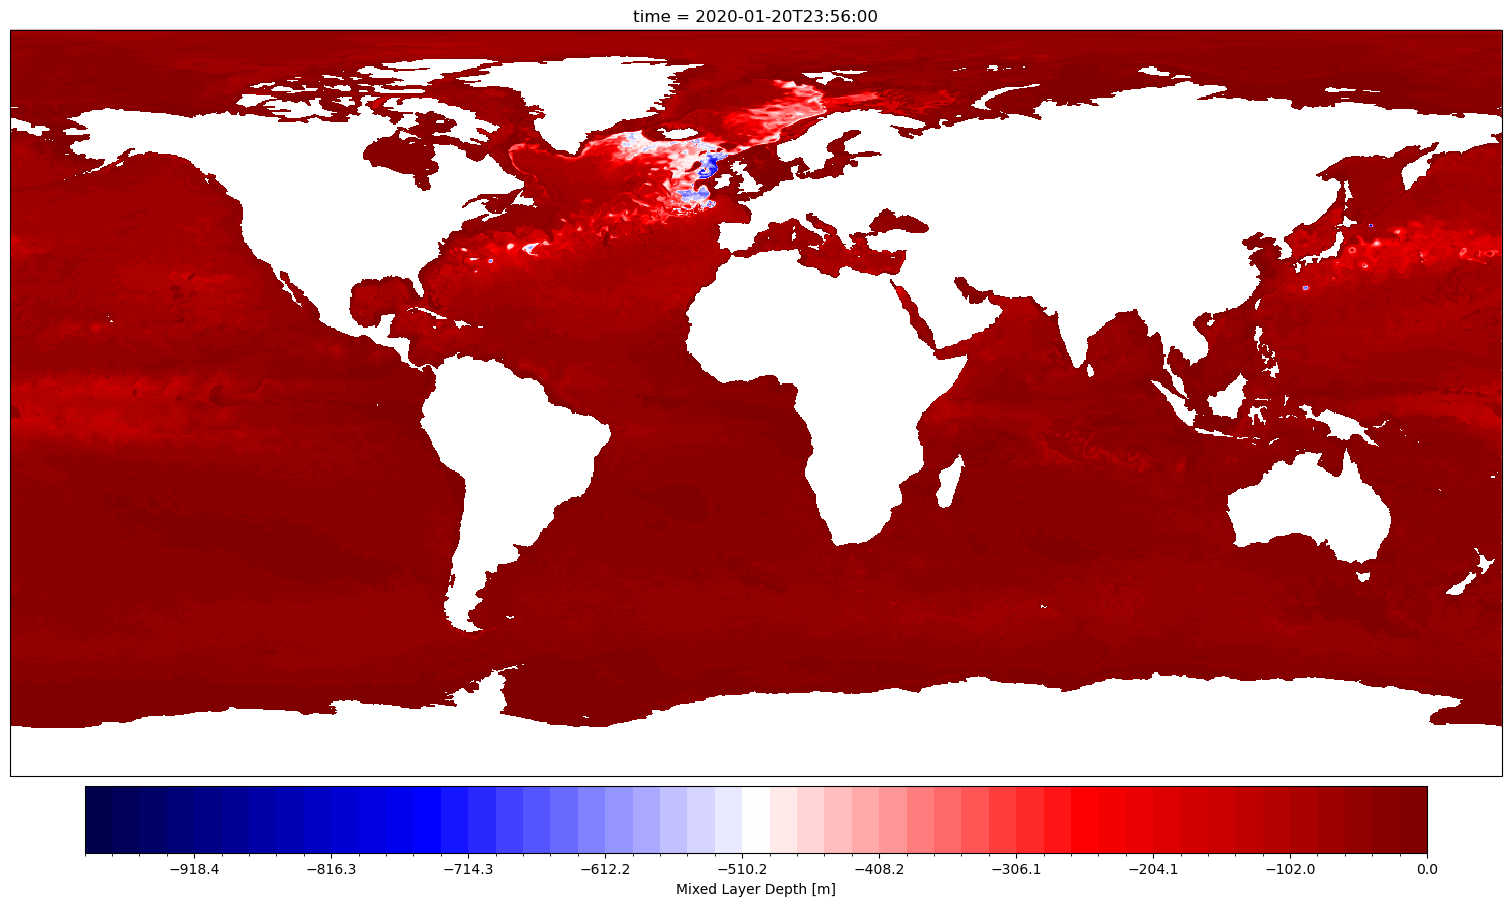

In [15]:
plt.subplots(
            1,
            1,
            subplot_kw=dict(projection=working_projection),
            constrained_layout=True,
            figsize=(15,10),
        )

data['MLD1'][0,:].plot( 
                      transform=ccrs.PlateCarree(),
                      cbar_kwargs={"shrink": 0.9, "pad": 0.01, "orientation": "horizontal"},
                      levels=np.linspace(-1000, 0, 50),
                      cmap=cm.seismic
                     )